# Ridge Classifier

<span>The sklearn Rigde classifier is the same model as the Logistic Regressor with l2 regularization. The only difference is that this classifier lets you control the degree of the regularization strength instead of it's inverse like the Logistic Regression model.</span>

### Import Preliminaries

In [23]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings

from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import RidgeClassifier

# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',30)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set plotting option
mpl.rcParams['figure.figsize'] = (9.0, 3.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [24]:
# Import Data
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split the data
train_x, test_x, train_y, test_y = train_test_split(X,y)

wdf = pd.DataFrame(wine.data, columns=wine['feature_names'])
wdf = pd.concat([wdf, pd.DataFrame(wine.target, columns=['target'])], axis=1)
wdf.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.230,1.710,2.430,15.600,127.000,2.800,3.060,0.280,2.290,5.640,1.040,3.920,1065.000,0
1,13.200,1.780,2.140,11.200,100.000,2.650,2.760,0.260,1.280,4.380,1.050,3.400,1050.000,0
2,13.160,2.360,2.670,18.600,101.000,2.800,3.240,0.300,2.810,5.680,1.030,3.170,1185.000,0
3,14.370,1.950,2.500,16.800,113.000,3.850,3.490,0.240,2.180,7.800,0.860,3.450,1480.000,0
4,13.240,2.590,2.870,21.000,118.000,2.800,2.690,0.390,1.820,4.320,1.040,2.930,735.000,0


### Targets

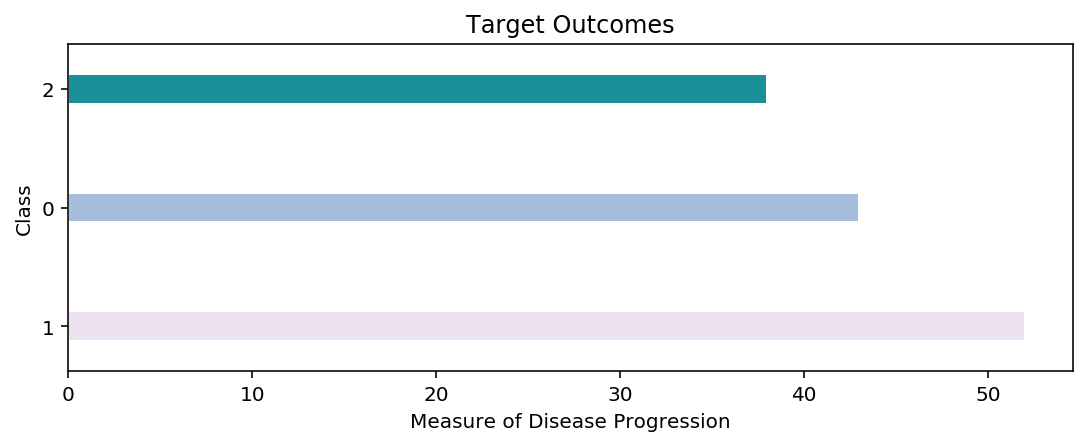

In [25]:
# Plot a barplot of the target clasees
pd.Series(train_y).value_counts().plot.barh(grid=False, color=['#ece2f0','#a6bddb','#1c9099'], width=0.25,edgecolor='w')
plt.title('Target Outcomes')
plt.ylabel('Class')
plt.xlabel('Measure of Disease Progression');

### Fit the Model

In [26]:
# Fit the intial logistic model 
rc_model = RidgeClassifier()
rc_model.fit(train_x, train_y);

### Model Evaluation

##### Cross Validation Score

In [27]:
scores = cross_val_score(rc_model, train_x, train_y, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.98564


##### Confusion Matrix

In [28]:
# Training Confusion Matrix
cmatrix = pd.DataFrame(confusion_matrix(train_y, rc_model.predict(train_x)))
cmatrix.index.name = 'class'
cmatrix['result'] = 'actual'
cmatrix.set_index('result', append=True, inplace=True)
cmatrix = cmatrix.reorder_levels(['result', 'class'])
cmatrix = cmatrix.stack()
cmatrix = pd.DataFrame(cmatrix)
cmatrix.columns = ['prediction']
cmatrix.unstack()

prediction        
                      0   1   2
result class                   
actual 0             43   0   0
       1              0  51   1
       2              0   0  38

##### Parameter Tuning

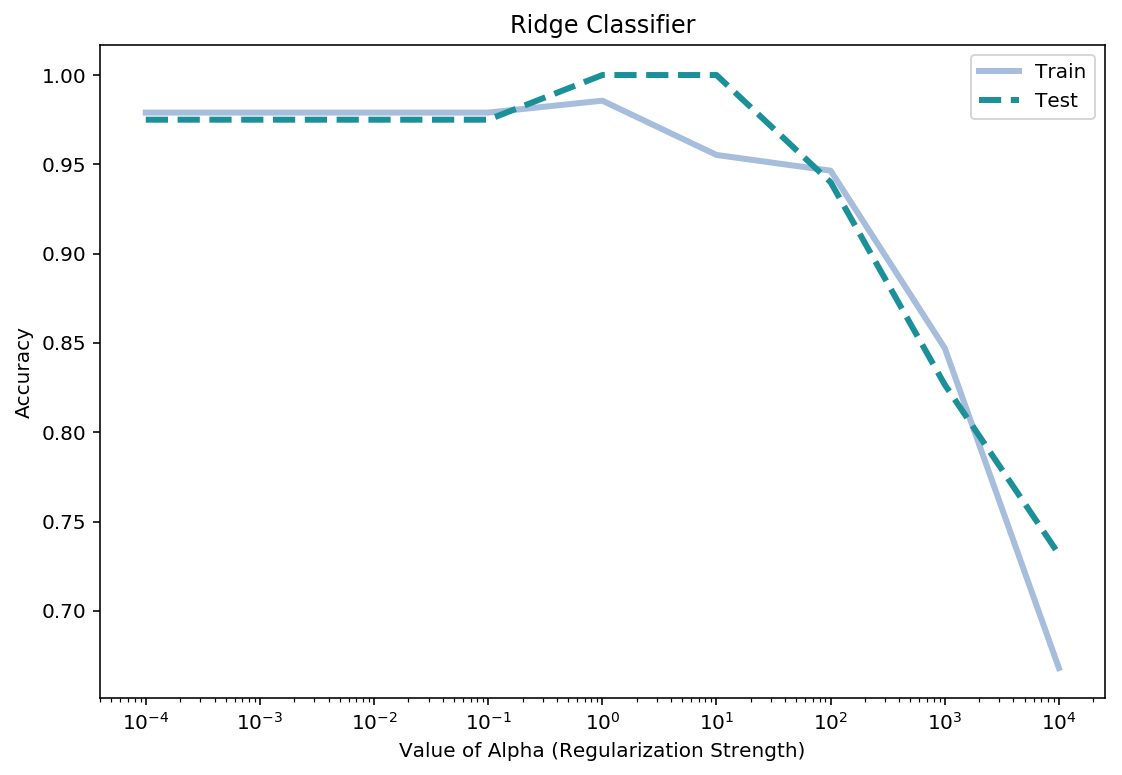

In [34]:
# Define paraameter range and score lists
alpha_range = [0.0001, 0.01,0.1, 1, 10, 100, 1000, 10000,10000]
train_score = []
test_score = []

# Train a rc_model for every neighbour value in our list
for i in alpha_range:
    rc_model=RidgeClassifier(alpha=i).fit(train_x,train_y)
    train_score.append(cross_val_score(rc_model, train_x, train_y, cv=10, scoring='accuracy').mean())
    test_score.append(cross_val_score(rc_model, test_x, test_y, cv=10, scoring='accuracy').mean())
                      
# Plot our results
fig, ax = plt.subplots()
mpl.rcParams['figure.figsize'] = (9.0, 6.0)
plt.plot(c_range,train_score,label="Train",linewidth=3, color='#a6bddb') 
plt.plot(c_range,test_score,label="Test", linewidth=3,linestyle='--', color='#1c9099')
plt.legend()
plt.title('Ridge Classifier')
plt.xlabel('Value of Alpha (Regularization Strength)')
plt.ylabel('Accuracy');
ax.set_xscale('log')

### Final Model

In [35]:
# Fit the intial logistic model 
rc_model = RidgeClassifier(alpha=0.001)
rc_model.fit(train_x, train_y);
scores = cross_val_score(rc_model, train_x, train_y, cv=10,
               scoring='accuracy')
print(f'Cross Validation Score: {scores.mean():.5f}')

Cross Validation Score: 0.97897


### Predicts Results

In [36]:
# View some predictions
pd.Series(rc_model.predict(test_x)).head(n=7)

0    1
1    0
2    1
3    0
4    0
5    2
6    1
dtype: int64

Author: Kavi Sekhon